In [1]:
import os, json, argparse
from pathlib import Path
import torch
import numpy as np
import matplotlib.pyplot as plt
from data_augmentation import *

from utils import *

from torch.utils.data import Subset, DataLoader, ConcatDataset
from torchvision import transforms
import torch
from torch import nn

import torchvision

from skimage.segmentation import felzenszwalb, slic, quickshift, watershed, mark_boundaries

import cv2
import kornia
from tqdm import tqdm
import numpy as np
import csv

In [2]:
import cv2
import pims
test = pims.Video("C:/Users/Karol/Documents/DL4H/datasets/cholec80/video01.mp4")

In [3]:
def imshow_tensor(axs_ref, tensor, denormalize = False):
    '''
        axs_ref: reference to matplotlib axs for plotting.
        tensor: C, H, W image tensor
    '''
    if denormalize:
        tensor = (tensor + 1.0)/2.0

    axs_ref.imshow(kornia.utils.tensor_to_image(transforms.ConvertImageDtype(torch.uint8)(tensor.cpu())))

# Playing with Cholec Dataset

Code block below re-organizes cholec80 dataset into my prefered file format.

In [4]:
print(os.listdir("../"))

['DataAugmentation', 'datasets', 'DL4H-Desmoking-Laparoscopy-Surgery-Images', 'DL4H.code-workspace', 'notes_writeup.txt', 'Python-Clouds', 'smoke_gen_parallel_commands.txt', 'smoke_removal', 'test', 'test2']


In [5]:
# WARNING RUN TO RE-ORGANIZE CHOLEC80 DATASET INTO MY PREFRED FILE FORMAT
# Assume we have a "fresh" cholec80 dataset and we want to make it into my file structure:
#  - top_level folder - video_folder - vid.mp4
#                                      smoke_label
#                                      frame_label
#                                      phase_annotations
#                                      tool_annotation

import shutil

pre_path = "C:/Users/Karol/Documents/DL4H"

vid_path_parent = pre_path + '/datasets/cholec80/videos/'
tool_txt_path_parent = pre_path + '/datasets/cholec80/tool_annotations/'
smoke_csv_path_parent = pre_path + '/datasets/cholec80/Smoke_Cholec80_v1.0/cholec80_mappings/'
phase_txt_path_parent = pre_path + '/datasets/cholec80/phase_annotations/'
out_path_parent = pre_path + '/datasets/cholec80/input_formatted'

vid_file_list = [ f for f in os.listdir(vid_path_parent) if f.endswith('.mp4')]

for vid_file_name in vid_file_list:
    vid_name = os.path.splitext(vid_file_name)[0]
    
    out_folder = os.path.join(out_path_parent, vid_name)
    tool_txt_path = os.path.join(tool_txt_path_parent, vid_file_name + '.csv')
    
    if not os.path.exists(out_folder):
        os.makedirs(out_folder)
    
    # Move video file
    shutil.move(os.path.join(vid_path_parent, vid_file_name), 
                os.path.join(out_folder, vid_file_name))
    # Move companioning csv video file
    shutil.move(os.path.join(vid_path_parent, vid_name + '-timestamp.txt'), 
                os.path.join(out_folder, 'timestamp.txt'))
    # Move tool annotation file
    shutil.move(os.path.join(tool_txt_path_parent, vid_name + '-tool.txt'), 
                os.path.join(out_folder, 'tool_annotation.csv'))
        # Move phase annotation file
    shutil.move(os.path.join(phase_txt_path_parent, vid_name + '-phase.txt'), 
                os.path.join(out_folder, 'phase_annotation.csv'))
    # Move smoke annotation file
    shutil.move(os.path.join(smoke_csv_path_parent, vid_file_name + '.csv'), 
                os.path.join(out_folder, 'smoke_annotation.csv'))

Look at image quality metrics of cholec80 datasets

In [6]:
args = {
        'size': 256,
        'dataset': pre_path + '/datasets/cholec80/input_formatted',
        'cache': pre_path + '/datasets/cholec80/cache',
        'smoke': pre_path + '/datasets/cholec80/synthetic_smoke/',
#         'smoke': '/home/flodri/Datasets/smoke/empty/',
        'subsample': 5,
        'multiframe': [1, 2, 3],
}

vid_transform = transforms.Compose([
                                    transforms.Resize((int(args['size']), int(args['size']))),
                                    transforms.ConvertImageDtype(torch.float32),
                                  ])

In [7]:
img_quality_data = getVidData(vid_dataset_path = args['dataset'],
                              loader_type="qual",
                              vid_dataset_cache_path = args['cache'],
                              transform = vid_transform,
                              scope_cropping = True,
                              clear_csv = False,
                              clear_cache_directory=False,
                              )

CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 43325 but video length is 43326. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video01\quality_metrics.csv.


NUM ROWS IN CSV WRONG
CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 70975 but video length is 70976. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video02\quality_metrics.csv.


NUM ROWS IN CSV WRONG
CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 145700 but video length is 145701. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video03\quality_metrics.csv.


NUM ROWS IN CSV WRONG
CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 38050 but video length is 38051. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video04\quality_metrics.csv.


NUM ROWS IN CSV WRONG
CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 58600 but video length is 58601. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video05\quality_metrics.csv.


NUM ROWS IN CSV WRONG
CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 53825 but video length is 53826. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video06\quality_metrics.csv.


NUM ROWS IN CSV WRONG
CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 113925 but video length is 113926. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video07\quality_metrics.csv.


NUM ROWS IN CSV WRONG
CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 37975 but video length is 37976. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video08\quality_metrics.csv.


NUM ROWS IN CSV WRONG
CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 67550 but video length is 67551. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video09\quality_metrics.csv.


NUM ROWS IN CSV WRONG
CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 43725 but video length is 43726. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video10\quality_metrics.csv.


NUM ROWS IN CSV WRONG


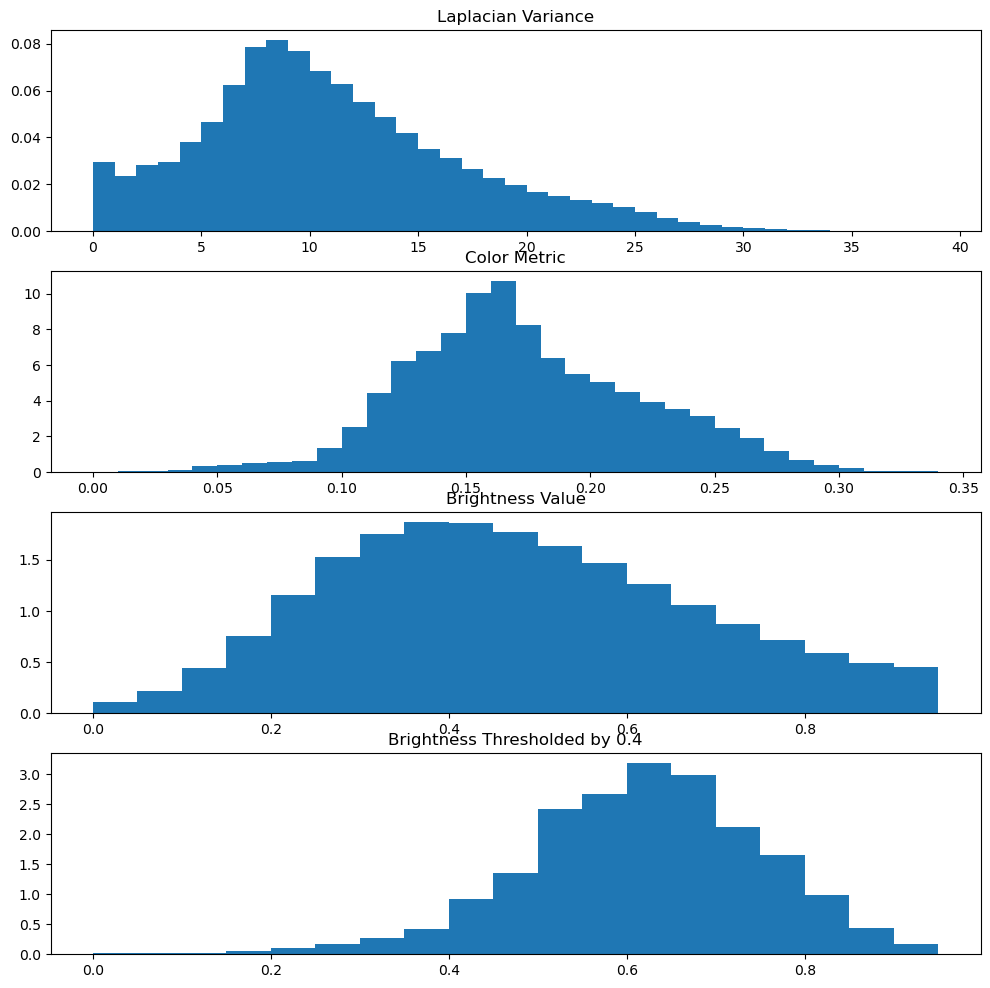

In [8]:
laplacian_variance_data = torch.cat([d.lap for d in img_quality_data])
color_data = torch.cat([d.col for d in img_quality_data])
brightness_data = torch.cat([ torch.cat(d.bright) for d in img_quality_data])

b_th = 0.4
brightness_thresh_data = [ torch.tensor([ torch.sum(img_d > b_th)/len(img_d) 
                                                for img_d in d.bright])  
                                                    for d in img_quality_data ]
brightness_thresh_data = torch.cat(brightness_thresh_data)

fig, axs = plt.subplots(4, 1, figsize=(12, 12))
axs[0].hist(laplacian_variance_data.cpu().numpy(), bins = np.arange(0, 40, 1), density = True)
axs[0].set_title('Laplacian Variance')
axs[1].hist(color_data.cpu().numpy(), bins = np.arange(0, 0.35, 0.01), density = True)
axs[1].set_title('Color Metric')
axs[2].hist(brightness_data.cpu().numpy(), bins = np.arange(0, 1, 0.05), density = True)
axs[2].set_title('Brightness Value')
axs[3].hist(brightness_thresh_data.cpu().numpy(), bins = np.arange(0, 1, 0.05), density = True)
axs[3].set_title('Brightness Thresholded by {}'.format(b_th))

plt.show()

Length of full dataset 673660
Length of new dataset 9998
Assuming 0.0004gb per img, 10 synth images per raw, then total size is expected: 119.97600000000001gb


c:\Users\Karol\.conda\envs\DL4H_CS598\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


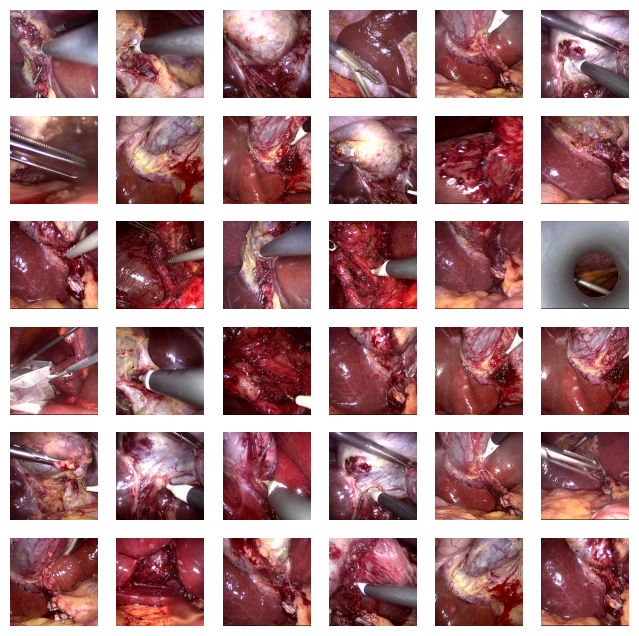

In [9]:
# Randomly sample from top of distributions??
l_th = 15
c_th = 0.15
b_th_th = 0.8
num_rand = 6**2

full_dataset = ConcatDataset(img_quality_data)
mask = (laplacian_variance_data > l_th)*(color_data > c_th)*(brightness_thresh_data > b_th_th)

dataset = Subset(full_dataset, torch.nonzero(mask))

print("Length of full dataset {}".format(len(full_dataset)))
print("Length of new dataset {}".format(len(dataset)))

img_size = 0.0004 #gb
num_synth_images_per_raw_img = 10
dataset_size = len(dataset)*img_size*num_synth_images_per_raw_img*3
print("Assuming {}gb per img, {} synth images per raw, then total size is expected: {}gb".format(img_size, num_synth_images_per_raw_img, dataset_size))

rand_img_idx = torch.randint(len(dataset), (num_rand,))
fig, axs = plt.subplots(int(np.sqrt(num_rand)), int(np.sqrt(num_rand)), figsize=(8, 8))
for img_idx, ax in zip(rand_img_idx, axs.flat):
    imshow_tensor(ax, dataset[img_idx][0])
    ax.axis('off')

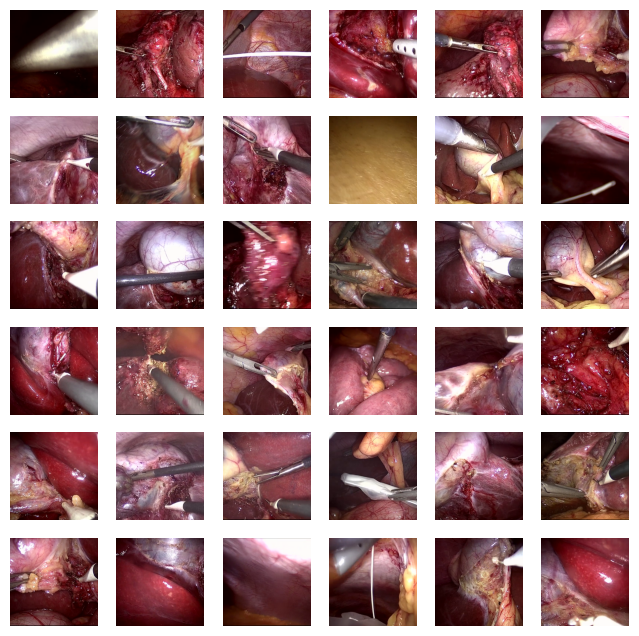

In [10]:
# Visualize random rejected data:
dataset = Subset(full_dataset, torch.nonzero(torch.logical_not(mask)))

rand_img_idx = torch.randint(len(dataset), (num_rand,))
fig, axs = plt.subplots(int(np.sqrt(num_rand)), int(np.sqrt(num_rand)), figsize=(8, 8))
for img_idx, ax in zip(rand_img_idx, axs.flat):
    imshow_tensor(ax, dataset[img_idx][0])
    ax.axis('off')

Look at synthetic data generated from the high quality images

In [11]:
# Prepare all the transforms and synthetic smoke loaders
synth_smoke_transforms = transforms.Compose([
                                            transforms.ConvertImageDtype(torch.float32),
                                            torchvision.transforms.CenterCrop((512, 512)),
                                          #    transforms.RandomHorizontalFlip(),
                                          #    transforms.RandomVerticalFlip(),
                                          #    HazeImage_RGBA(t=(0.8, 1.0), std_t=(0.0, 0.0), speckle_t=(0.0, 0.0), 
                                          #                   a=(0.6, 0.8), std_a=(0.0, 0.0), speckle_a=(0.0, 0.0),
                                          #                   keepdim=True, p = 0.5),
                                          #    SpeckleImage(std = (0.00, 0.01), speckle = (0.0, 0.025),
                                          #                keepdim=True, p = 0.5),
                                          #    UniformlyIncreaseChannel(channel_idx = 2, 
                                          #                             increase_amount = (0.0, 0.15),
                                          #                             keepdim = True, p = 0.5),
                                          #    RandomHueRGBA(hue=(-0.15, 0.15)),
                                          #    Darken(alpha = (0.95, 1.05), beta = (0.95, 1.05), 
                                          #           gamma = (0.9, 1.1), keepdim=True, p = 0.5),
                                          #    UniformlyIncreaseChannel(channel_idx=3,
                                          #                             increase_amount= (0.0, 0.15),
                                          #                             keepdim = True, p = 0.5)
                                            ])

bg_img_transform = transforms.Compose([
                                       transforms.GaussianBlur(9, sigma=(0.01, 2.0)),
                                       kornia.augmentation.RandomBoxBlur(p=0.5, keepdim=True),
                                       kornia.augmentation.RandomMotionBlur(p=0.5, 
                                                                            kernel_size = (3, 13), 
                                                                            angle = (0, 360), 
                                                                            direction = (-1.0, 1.0),
                                                                            border_type = 'replicate',
                                                                            keepdim=True),
                                       Darken(alpha = (0.9, 1.0), beta = (0.9, 1.0), 
                                              gamma = (1.0, 2.0), keepdim=True, p = 0.5),
                                      ])


prev_frame_transform = transforms.Compose([
                                            transforms.ConvertImageDtype(torch.float32),
                                            kornia.augmentation.RandomPerspective(distortion_scale=0.1,
                                                                                  p = 0.5,
                                                                                  keepdim=True,
                                                                                  sampling_method='area_preserving',
                                                                                  ),
                                           ])

target_frame_transform = transforms.Compose([
                                            kornia.augmentation.RandomSaturation(saturation=(1.2, 1.2), 
                                                                                 p=1.0, keepdim=True),
                                            
    
                                            ])


synth_smoke_data = ConcatDataset([SmokeDirectoryLoader(os.path.join(args['smoke'], directory), 
                                                                    synth_smoke_transforms) 
                                    for directory in os.listdir(args['smoke'])  
                                    if os.path.isdir(os.path.join(args['smoke'], directory))])

In [12]:
# Do synthetic data augmentation on an image right before smoke appears and compare against after smoke appears
# Compare visually (by looking) and some pixel distributions/metrics

vid_transform = transforms.Compose([
                                    torchvision.transforms.Resize((512, 512)),
                                    transforms.ConvertImageDtype(torch.float32),
                                   ])

vid_data = getVidData(vid_dataset_path = args['dataset'],
                      loader_type="cholec_smoke",
                      vid_dataset_cache_path = None,
                      transform = vid_transform,
                      scope_cropping = True,
                      clear_cache_directory=False,
                      )

In [13]:
len(vid_data)

10

c:\Users\Karol\.conda\envs\DL4H_CS598\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
c:\Users\Karol\.conda\envs\DL4H_CS598\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in 

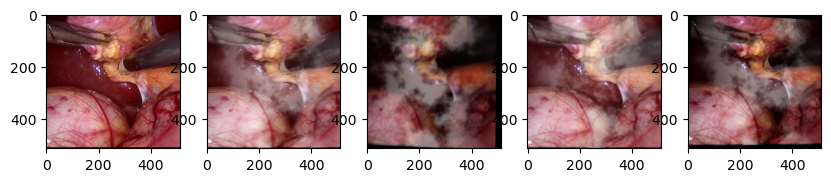

In [14]:
# Check a sequence of synthetically generated images (want to look that the mult-frame is consistent)
#   This doesn't use the image quality filter, just looks at any image
vid_idx = 8

def atmospheric_scattering_compose(vid_img:torch.tensor, smoke_img:torch.tensor) -> Union[torch.tensor, torch.tensor]:
    '''
        vid_img input need to be of shape 3xWxH with floating point RGB channels
        smoke_img input need to be of shape 4xWxH with floating point RGBA channels
        
        Using alpha compositing for these equations.

        Outputs are of form 3xWxH and WxH
    '''
    
    out_img = vid_img*(1 - 0.5*smoke_img[-1, :, :]) + smoke_img[:-1, :, :]*smoke_img[-1, :, :]*0.5
    out_img[out_img > 1] = 1

    out_mask = smoke_img[-1, :, :]
    return out_img, out_mask

syn_data = SynthSmokeLoader(vid_data[vid_idx], synth_smoke_data,
                            bg_img_transform = bg_img_transform,
                            idx_of_prev_frame = args['multiframe'],
                            output_transform = None,
                            prev_frame_transform = prev_frame_transform,
                            cache_directory = None,
                            target_transform = target_frame_transform,
                            compose_function=atmospheric_scattering_compose,)

num_imgs = len(args['multiframe']) + 1

# Plot input images
fig, axs = plt.subplots(1, num_imgs + 1, figsize=(10, 3))
data_tuple = syn_data[10000]

img_channels = int(data_tuple[0].shape[0]/num_imgs)

imshow_tensor(axs[0], data_tuple[2])
for t in range(num_imgs):
    imshow_tensor(axs[t + 1], data_tuple[0][t*img_channels:(t+1)*img_channels])

Create synthetic dataset!

In [18]:
vid_transform = transforms.Compose([
                                    torchvision.transforms.Resize((512, 512)),
                                    transforms.ConvertImageDtype(torch.float32),
                                   ])


# Prepare all the transforms and synthetic smoke loaders
synth_smoke_transforms = transforms.Compose([
                                            transforms.ConvertImageDtype(torch.float32),
                                            torchvision.transforms.CenterCrop((512, 512)),
                                          #   transforms.RandomHorizontalFlip(),
                                          #   transforms.RandomVerticalFlip(),
                                          #   HazeImage_RGBA(t=(0.8, 1.0), std_t=(0.0, 0.0), speckle_t=(0.0, 0.0), 
                                          #                  a=(0.6, 0.8), std_a=(0.0, 0.0), speckle_a=(0.0, 0.0),
                                          #                  keepdim=True, p = 0.5),
                                          #   SpeckleImage(std = (0.00, 0.01), speckle = (0.0, 0.025),
                                          #               keepdim=True, p = 0.5),
                                          #   UniformlyIncreaseChannel(channel_idx = 2, 
                                          #                            increase_amount = (0.0, 0.15),
                                          #                            keepdim = True, p = 0.5),
                                          #   RandomHueRGBA(hue=(-0.15, 0.15)),
                                          #   Darken(alpha = (0.95, 1.05), beta = (0.95, 1.05), 
                                          #          gamma = (0.9, 1.1), keepdim=True, p = 0.5),
                                          #   UniformlyIncreaseChannel(channel_idx=3,
                                          #                            increase_amount= (0.0, 0.15),
                                          #                            keepdim = True, p = 0.5)
                                            ])

bg_img_transform = transforms.Compose([
                                       transforms.GaussianBlur(9, sigma=(0.01, 2.0)),
                                       kornia.augmentation.RandomBoxBlur(p=0.5, keepdim=True),
                                       kornia.augmentation.RandomMotionBlur(p=0.5, 
                                                                            kernel_size = (3, 13), 
                                                                            angle = (0, 360), 
                                                                            direction = (-1.0, 1.0),
                                                                            border_type = 'replicate',
                                                                            keepdim=True),
                                       Darken(alpha = (0.9, 1.0), beta = (0.9, 1.0), 
                                              gamma = (1.0, 2.0), keepdim=True, p = 0.5),
                                      ])



prev_frame_transform = transforms.Compose([
                                            transforms.ConvertImageDtype(torch.float32),
                                            kornia.augmentation.RandomPerspective(distortion_scale=0.1,
                                                                                  p = 0.5,
                                                                                  keepdim=True,
                                                                                  sampling_method='area_preserving',
                                                                                  ),
                                           ])

output_transform_synth = transforms.Compose([
                                            transforms.ConvertImageDtype(torch.float32),
                                            transforms.RandomRotation((-5.0, 5.0)),
                                            torchvision.transforms.RandomResizedCrop((args['size'], args['size'])),
                                            transforms.RandomHorizontalFlip(),
                                            transforms.RandomVerticalFlip(),
                                            transforms.Normalize(mean = 0.5, std = 0.5),
                                            ])

output_transform_real = transforms.Compose([
                                            transforms.ConvertImageDtype(torch.float32),
                                            torchvision.transforms.Resize((args['size'], args['size'])),
                                            transforms.Normalize(mean = 0.5, std = 0.5),
                                            ])

target_transform = transforms.Compose([
                                        kornia.augmentation.RandomSaturation(saturation=(1.2, 1.2), 
                                                                             p=1.0, keepdim=True),


                                        ])

# Add name to call the top-level folders
synth_smoke_dataset_list, real_smoke_dataset_list = getDatasets(vid_dataset_path = args['dataset'],
                                                                loader_type = 'cholec_smoke',
                                                                vid_dataset_cache_path = args['cache'],
                                                                cache_path_synth_smoke = os.path.join(args['cache'], "new_synth_smoke"),
                                                                cache_path_real_smoke  = os.path.join(args['cache'], "real_smoke"),
                                                                vid_transform = vid_transform,
                                                                vid_dataset_apply_scope_cropping = True,
                                                                smoke_dataset_path = args['smoke'],
                                                                synth_smoke_transforms = synth_smoke_transforms,
                                                                multi_frame = args['multiframe'],
                                                                bg_img_transform = bg_img_transform,
                                                                output_transform_synth = output_transform_synth,
                                                                output_transform_real = output_transform_real,
                                                                prev_frame_transform = prev_frame_transform,
                                                                l_th = 15,
                                                                c_th = 0.15,
                                                                b_th_th = 0.8,
                                                                target_transform = target_transform,
                                                                clear_cache_directory=False,
                                                                compose_function=atmospheric_scattering_compose)

CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 43325 but video length is 43326. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video01\quality_metrics.csv.


NUM ROWS IN CSV WRONG
CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 70975 but video length is 70976. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video02\quality_metrics.csv.


NUM ROWS IN CSV WRONG
CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 145700 but video length is 145701. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video03\quality_metrics.csv.


NUM ROWS IN CSV WRONG
CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 38050 but video length is 38051. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video04\quality_metrics.csv.


NUM ROWS IN CSV WRONG
CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 58600 but video length is 58601. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video05\quality_metrics.csv.


NUM ROWS IN CSV WRONG
CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 53825 but video length is 53826. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video06\quality_metrics.csv.


NUM ROWS IN CSV WRONG
CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 113925 but video length is 113926. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video07\quality_metrics.csv.


NUM ROWS IN CSV WRONG
CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 37975 but video length is 37976. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video08\quality_metrics.csv.


NUM ROWS IN CSV WRONG
CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 67550 but video length is 67551. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video09\quality_metrics.csv.


NUM ROWS IN CSV WRONG
CSV IS STILL GOOD SO GOOD
CSV is good?


Number of rows in csv file is 43725 but video length is 43726. Recommend deleting csv file so it is recomputed: C:/Users/Karol/Documents/DL4H/datasets/cholec80/input_formatted\video10\quality_metrics.csv.


NUM ROWS IN CSV WRONG
torch.Size([43326])
torch.Size([43325])
torch.Size([70976])
torch.Size([70975])
torch.Size([145701])
torch.Size([145700])
torch.Size([38051])
torch.Size([38050])
torch.Size([58601])
torch.Size([58600])
torch.Size([53826])
torch.Size([53825])
torch.Size([113926])
torch.Size([113925])
torch.Size([37976])
torch.Size([37975])
torch.Size([67551])
torch.Size([67550])
torch.Size([43726])
torch.Size([43725])


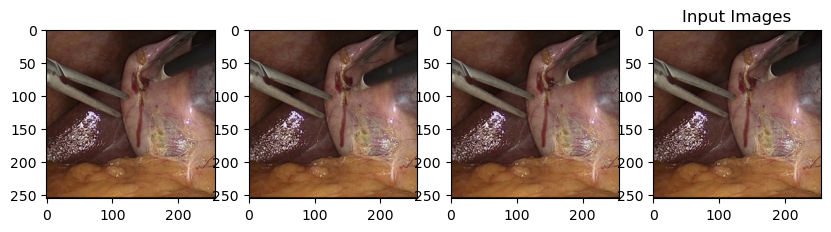

In [16]:
# Check idx of real smoked image(s)
real_smoke_dataset = ConcatDataset(real_smoke_dataset_list)
idx = -700

num_imgs = len(args['multiframe']) + 1
img_channels = int(real_smoke_dataset[idx][0].shape[0]/num_imgs)

# Plot input images
fig, axs = plt.subplots(1, num_imgs, figsize=(10, 3))
plt.title("Input Images")
for t in range(num_imgs):
    imshow_tensor(axs[t], real_smoke_dataset[idx][0][t*img_channels:(t+1)*img_channels]  , denormalize = True)

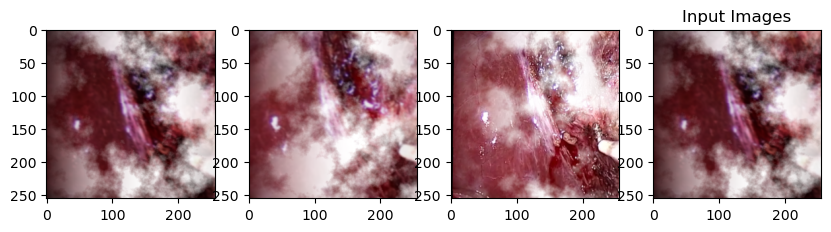

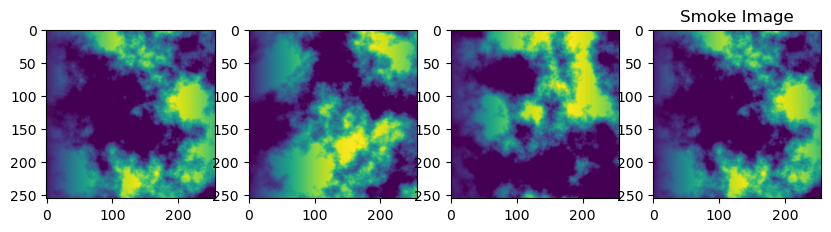

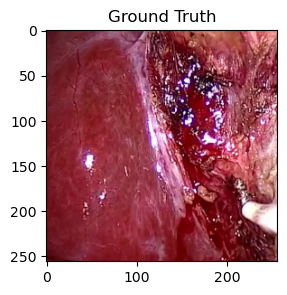

In [17]:
# Check idx of synthetically smoked image(s)
synth_smoke_dataset = ConcatDataset(synth_smoke_dataset_list)

dataset_tuple = synth_smoke_dataset[idx]

idx = int(-100)

num_imgs = len(args['multiframe']) + 1
img_channels = int(dataset_tuple[0].shape[0]/num_imgs)

# Plot input images
fig, axs = plt.subplots(1, num_imgs, figsize=(10, 3))
plt.title("Input Images")
for t in range(num_imgs):
    imshow_tensor(axs[t], dataset_tuple[0][t*img_channels:(t+1)*img_channels], denormalize=True)

    
# Plot ground truth
smoke_channels = int(dataset_tuple[1].shape[0]/num_imgs)
fig, axs = plt.subplots(1, num_imgs, figsize=(10, 3))
plt.title("Smoke Image")
for t in range(num_imgs):
    imshow_tensor(axs[t], dataset_tuple[1][t*smoke_channels:(t+1)*smoke_channels], denormalize=True)
    

# Plot ground truth
fig, axs = plt.subplots(1, 1, figsize=(10, 3))
plt.title("Ground Truth")
imshow_tensor(axs, dataset_tuple[2], denormalize=True)